In [ ]:
!pip install mip #pyomo, cvxpy 
from mip import *
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

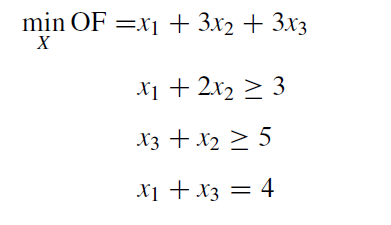



**STEP-1:** Create the model.

In [ ]:
m_1 = Model('model_1')

**STEP-2:** Define variables.

In [ ]:
x_1 = m_1.add_var(lb=-100,ub=100,var_type=BINARY)
x_2 = m_1.add_var()
x_3 = m_1.add_var()

**STEP-3:** Define constraints.

In [ ]:
m_1 += x_1 + 2*x_2 >= 3
m_1 += x_3 + x_2 >= 5
m_1 += x_1 + x_3 == 4

**STEP-4:** Define objective function.

In [ ]:
m_1.objective = minimize(x_1+3*x_2+3*x_3)

**STEP-5:** Execute optimization.

In [ ]:
m_1.optimize()

**STEP-6:** Print the results.

In [ ]:
print('')
print('Objective value: {m_1.objective_value:.3} '.format(**locals()))
print('Solution: ', end='')
for v in m_1.vars:
  if v.x > 1e-5:
    print('{v.name} = {v.x} '.format(**locals()))
    print(' ', end='')

In [ ]:
I = range(0,3)

In [ ]:
for i in I:
  print(i)

In [ ]:
m_1 = Model('model_1')
I = range(0,3)
#x_1 = m_1.add_var()
x = [m_1.add_var() for i in I]
#m_1 += x_1 + 2*x_2 >= 3
m_1 += x[0] + 2*x[1] >= 3
m_1 += x[2] + x[1] >= 5
m_1 += x[0] + x[2] == 4
m_1.objective = minimize(x[0]+3*x[1]+3*x[2])
m_1.optimize()
print('')
print('Objective value: {m_1.objective_value:.3} '.format(**locals()))
print('Solution: ', end='')
for v in m_1.vars:
  if v.x > 1e-5:
    print('{v.name} = {v.x} '.format(**locals()))
    print(' ', end='')

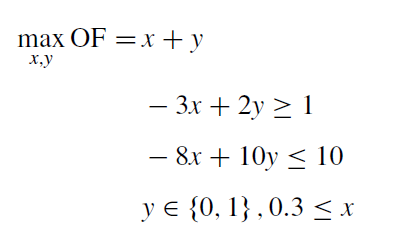

**STEP-1:** Create the model.

In [ ]:
m_2 = Model('model2')



**STEP-2:** Define variables.

In [ ]:
x = m_2.add_var(lb=0.3)
y = m_2.add_var(var_type=BINARY)

**STEP-3:** Define constraints.

In [ ]:
m_2 += -3*x+2*y >= 1
m_2 += -8*x + 10*y <= 10
m_2 += x >= 0.3

**STEP-4:** Define objective function.

In [ ]:
m_2.objective = maximize(x+y)

**STEP-5:** Execute optimization.

In [ ]:
m_2.optimize()

**STEP-6:** Print the results.

In [ ]:
print('')
print('Objective value: {m_2.objective_value:.3} '.format(**locals()))
print('Solution: ', end='')
for v in m_2.vars:
  if v.x > 1e-5:
    print('{v.name} = {v.x} '.format(**locals()))
    print(' ', end='')

**The 0/1 Knapsack Problem**

Consider the solution of the 0/1 knapsack problem: given a set I of items, each one with a weight wi and estimated profit pi, one wants to select a subset with maximum profit such that the summation of the weights of the selected items is less or equal to the knapsack capacity c. Considering a set of decision binary variables xi that receive value 1 if the i-th item is selected, or 0 if not, the resulting mathematical programming formulation is:


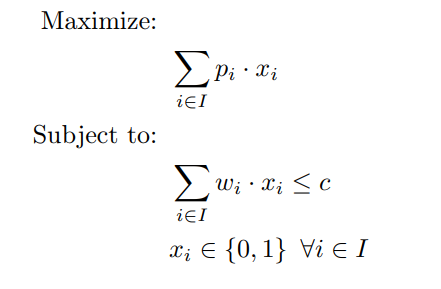

**STEP-0:** Define parameters and sets.

In [ ]:
p = [10, 13, 18, 31, 7, 15]
w = [11, 15, 20, 35, 10, 33]

In [ ]:
I =range(0,6)

In [ ]:
for i in I:
  print(i)

In [ ]:
c = 47 # the knapsack capacity 
I = range(len(w)) # set I of items

In [ ]:
for i in I:
  print(i)

**STEP-1:** Create the model.

In [ ]:
m_3 = Model('model3')

**STEP-2:** Define variables.

In [ ]:
x = [m_3.add_var(var_type=BINARY) for i in I]

**STEP-3:** Define constraints.

In [ ]:
m_3 += xsum(w[i] * x[i] for i in I) <= c

**STEP-4:** Define objective function.

In [ ]:
m_3.objective = maximize(xsum(p[i] * x[i] for i in I))

**STEP-5:** Execute optimization.

In [ ]:
m_3.optimize()

**AŞAMA-6:** Sonuçlar yazdırılır.

In [ ]:
selected = [i for i in I if x[i].x >= 0.99]
print("selected items: {} ".format(selected))

**STEP-0:** Define parameters and sets.

In [ ]:
p_max = [100,80]
p_min = [0,0]
price = [12,20]
demand = [100,50]

In [ ]:
K = range(len(p_max)) #range(0,2)
I = range(len(demand))

**STEP-1:** Create the model.

In [ ]:
m_4 = Model('model_4')

**STEP-2:** Define variables.

In [ ]:
p = [m_4.add_var('p{}'.format(k+1)) for k in K]

**STEP-3:** Define constraints.

In [ ]:
for k in K:
  m_4 += p[k] <= p_max[k]
  m_4 += p[k] >= p_min[k]
m_4 += xsum(p[k] for k in K)>= xsum(demand[i] for i in I) #power balance

**STEP-4:** Define objective function.

In [ ]:
m_4.objective = minimize(xsum(p[k] * price[k] for k in K)) #p[0] * price[0] + p[1] * price[1]

**STEP-5:** Execute optimization.

In [ ]:
m_4.max_gap = 0.05
status = m_4.optimize()

**STEP-6:** Print the results.

In [ ]:
if status == OptimizationStatus.OPTIMAL:
    print('optimal solution cost {}'.format(m_4.objective_value))
elif status == OptimizationStatus.FEASIBLE:
    print('sol.cost {} found, best possible: {}'.format(m_4.objective_value, m_4.objective_bound))
elif status == OptimizationStatus.NO_SOLUTION_FOUND:
    print('no feasible solution found, lower bound is: {}'.format(m_4.objective_bound))
if status == OptimizationStatus.OPTIMAL or status == OptimizationStatus.FEASIBLE:
    print('solution:')
    for v in m_4.vars:
       if abs(v.x) > 1e-6: # only printing non-zeros
          print('{} : {}'.format(v.name, v.x))